# This file is for data visualization used in report

In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [88]:
lag = 0

In [119]:
# Load the shp file
oklahoma_map = gpd.read_file('../datasets/GeologicalData/Interpreted_faults/Interpretative.shp')

## depth to basement

In [130]:
import xarray as xr
from scipy import interpolate
from netCDF4 import Dataset as netcdf_dataset
import matplotlib.pyplot as plt

fn = "../datasets/GeologicalData/Basement_depth/DepthtoBasement_Anadarko_0.01deg.grd"
nc = xr.open_dataset(fn)
nc.z.to_dataframe().to_csv('../datasets/GeologicalData/Basement_depth/DepthtoBasement.csv')

df = pd.read_csv("../datasets/GeologicalData/Basement_depth/DepthtoBasement.csv")

In [131]:
df['z'].fillna(1, inplace=True)

Text(0.5, 1.0, '(e) Depth to Basement')

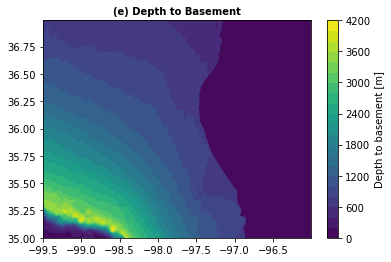

In [132]:
df.rename(columns={"x": "lon", "y": "lat"}, inplace=True)
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = df.drop(['lat', 'lon'], axis=1)
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
gdf['x_m'], gdf['y_m'] = gdf.geometry.x, gdf.geometry.y

# Interpolate onto discrete grid (for plotting smooth contours)
x_all = np.arange(-99.5, -96, 0.01)
y_all = np.arange(35, 37, 0.01)


xx, yy = np.meshgrid(x_all, y_all)
z_interp = interpolate.griddata((gdf['x_m'].values, gdf['y_m'].values), gdf['z'].values, (xx, yy),
                                method='linear')

ax = plt.subplot()
c = ax.contourf(xx, yy, z_interp, label="Smoothed depth to basement", levels=20)
cbar = plt.colorbar(c)
cbar.set_label("Depth to basement [m]")
# ax.set_xlim(-100, -96)
# ax.set_ylim(34.5, 37)
ax.set_title('(e) Depth to Basement', fontsize=10,fontweight='bold')

In [129]:
basement_df = df

## various activities

In [3]:
# earthquake data
inputdir = "../datasets/EarthquakeData"
all_earthquake_df = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        tmp_df = pd.read_csv(os.path.join(root, filename))
        all_earthquake_df = all_earthquake_df.append(tmp_df, ignore_index=True)

In [4]:
# set origintime as index
all_earthquake_df['origintime'] = all_earthquake_df['origintime'].astype('datetime64')
all_earthquake_df['Origin Date'] = all_earthquake_df['origintime']
all_earthquake_df = all_earthquake_df.set_index('origintime')
all_earthquake_df = all_earthquake_df[['magnitude', 'latitude', 'longitude', 'Origin Date']]
all_earthquake_df = all_earthquake_df["2010":"2021"]

In [5]:
# injection data
inputdir = "../datasets/OCC_injection_data/YearlyInjectionRecords"
# inputdir = "datasets/OCC_injection_data/MonthlyInjectionRecords"
yearly_injection_df = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        tmp_df = pd.read_excel(os.path.join(root, filename))
        yearly_injection_df = yearly_injection_df.append(tmp_df, ignore_index=True)

In [6]:
yearly_injection_df['Year Vol'] = yearly_injection_df['Jan Vol'] + \
                                yearly_injection_df['Feb Vol'] + \
                                yearly_injection_df['Mar Vol'] + \
                                yearly_injection_df['Apr Vol'] + \
                                yearly_injection_df['May Vol'] + \
                                yearly_injection_df['Jun Vol'] + \
                                yearly_injection_df['Jul Vol'] + \
                                yearly_injection_df['Aug Vol'] + \
                                yearly_injection_df['Sep Vol'] + \
                                yearly_injection_df['Oct Vol'] + \
                                yearly_injection_df['Nov Vol'] + \
                                yearly_injection_df['Dec Vol']
yearly_injection_df['Year PSI'] = yearly_injection_df['Jan PSI'] + \
                                yearly_injection_df['Feb PSI'] + \
                                yearly_injection_df['Mar PSI'] + \
                                yearly_injection_df['Apr PSI'] + \
                                yearly_injection_df['May PSI'] + \
                                yearly_injection_df['Jun PSI'] + \
                                yearly_injection_df['Jul PSI'] + \
                                yearly_injection_df['Aug PSI'] + \
                                yearly_injection_df['Sep PSI'] + \
                                yearly_injection_df['Oct PSI'] + \
                                yearly_injection_df['Nov PSI'] + \
                                yearly_injection_df['Dec PSI']

yearly_injection_df = yearly_injection_df.dropna(subset=["LAT", "LON"])
# Set Report_Date as index
yearly_injection_df['ReportYear'] = yearly_injection_df['ReportYear'].astype('datetime64')
yearly_injection_df = yearly_injection_df.set_index('ReportYear')
yearly_injection_df = yearly_injection_df[['TotalDepth', 'LAT', 'LON', 'FluidType', 'Year Vol', 'Year PSI', \
                                           'Jan Vol', 'Feb Vol', 'Mar Vol', 'Apr Vol', 'May Vol', 'Jun Vol', 'Jul Vol', 'Aug Vol', 'Sep Vol', 'Oct Vol', 'Nov Vol', 'Dec Vol', \
                                           'Jan PSI', 'Feb PSI', 'Mar PSI', 'Apr PSI', 'May PSI', 'Jun PSI', 'Jul PSI', 'Aug PSI', 'Sep PSI', 'Oct PSI', 'Nov PSI', 'Dec PSI']]

In [7]:
# injection data
inputdir = "../datasets/HydraulicFracturingData/FracFocusCSV"
# inputdir = "datasets/OCC_injection_data/MonthlyInjectionRecords"
all_HF = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        tmp_df = pd.read_csv(os.path.join(root, filename))
        all_HF = all_HF.append(tmp_df, ignore_index=True)

In [8]:
# all_HF['JobStartDate'] = all_HF['JobStartDate'].astype('datetime64')
# 9/25/2014 4:18:08 AM
all_HF = all_HF.dropna(subset=["JobStartDate", "JobEndDate", "Latitude", "Longitude"])
all_HF['JobStartDate'] = pd.to_datetime(all_HF['JobStartDate'], errors='coerce')
all_HF['JobEndDate'] = pd.to_datetime(all_HF['JobEndDate'], errors='coerce')
all_HF = all_HF[(all_HF['Latitude']>33.4)&(all_HF['Latitude']<37)&(all_HF['Longitude']>-103)&(all_HF['Longitude']<94.3)]

In [9]:
inputdir = "../datasets/WellData/"
all_well_df = pd.read_csv(inputdir + "Export - Excel Well Workbook_Header.csv")

In [10]:
all_well_df = all_well_df.dropna(subset=["Permit Date", 'Date First Report', 'Date Last Activity', "Depth Total Projected", "Surface Latitude", "Surface Longitude"])
all_well_df = all_well_df.set_index('Permit Date')
all_well_df['Date First Report'] = all_well_df['Date First Report'].astype('datetime64')
all_well_df['Date Last Activity'] = all_well_df['Date Last Activity'].astype('datetime64')
all_well_df = all_well_df[['Date First Report', 'Date Last Activity', "Depth Total Projected", "Hole Direction", "Surface Latitude", "Surface Longitude"]]
all_well_df = all_well_df[all_well_df['Hole Direction']=='VERTICAL']

## data filtering by time

In [15]:
# 检测某年的地震
earthquake_start = 2011
earthquake_end = 2018
earthquake_df = all_earthquake_df[str(earthquake_start):str(earthquake_end)]

In [16]:
# injection_df = monthly_injection_df
injection_start = earthquake_start - lag
injection_end = earthquake_end - lag
# injection_start = earthquake_start
# injection_end = earthquake_end
injection_df = yearly_injection_df.loc[str(injection_start):str(injection_end)]

In [17]:
HF_start = earthquake_start - lag
HF_end = earthquake_end - lag
all_HF['TotalBaseWaterVolume'].fillna(0, inplace=True)
all_HF['TotalBaseNonWaterVolume'].fillna(0, inplace=True)
HF_df = all_HF[(all_HF['JobStartDate']>=str(HF_start)) & (all_HF['JobStartDate']<=str(HF_end))]

In [18]:
well_start = earthquake_start - lag
well_df = all_well_df[all_well_df['Date Last Activity']>str(well_start)]

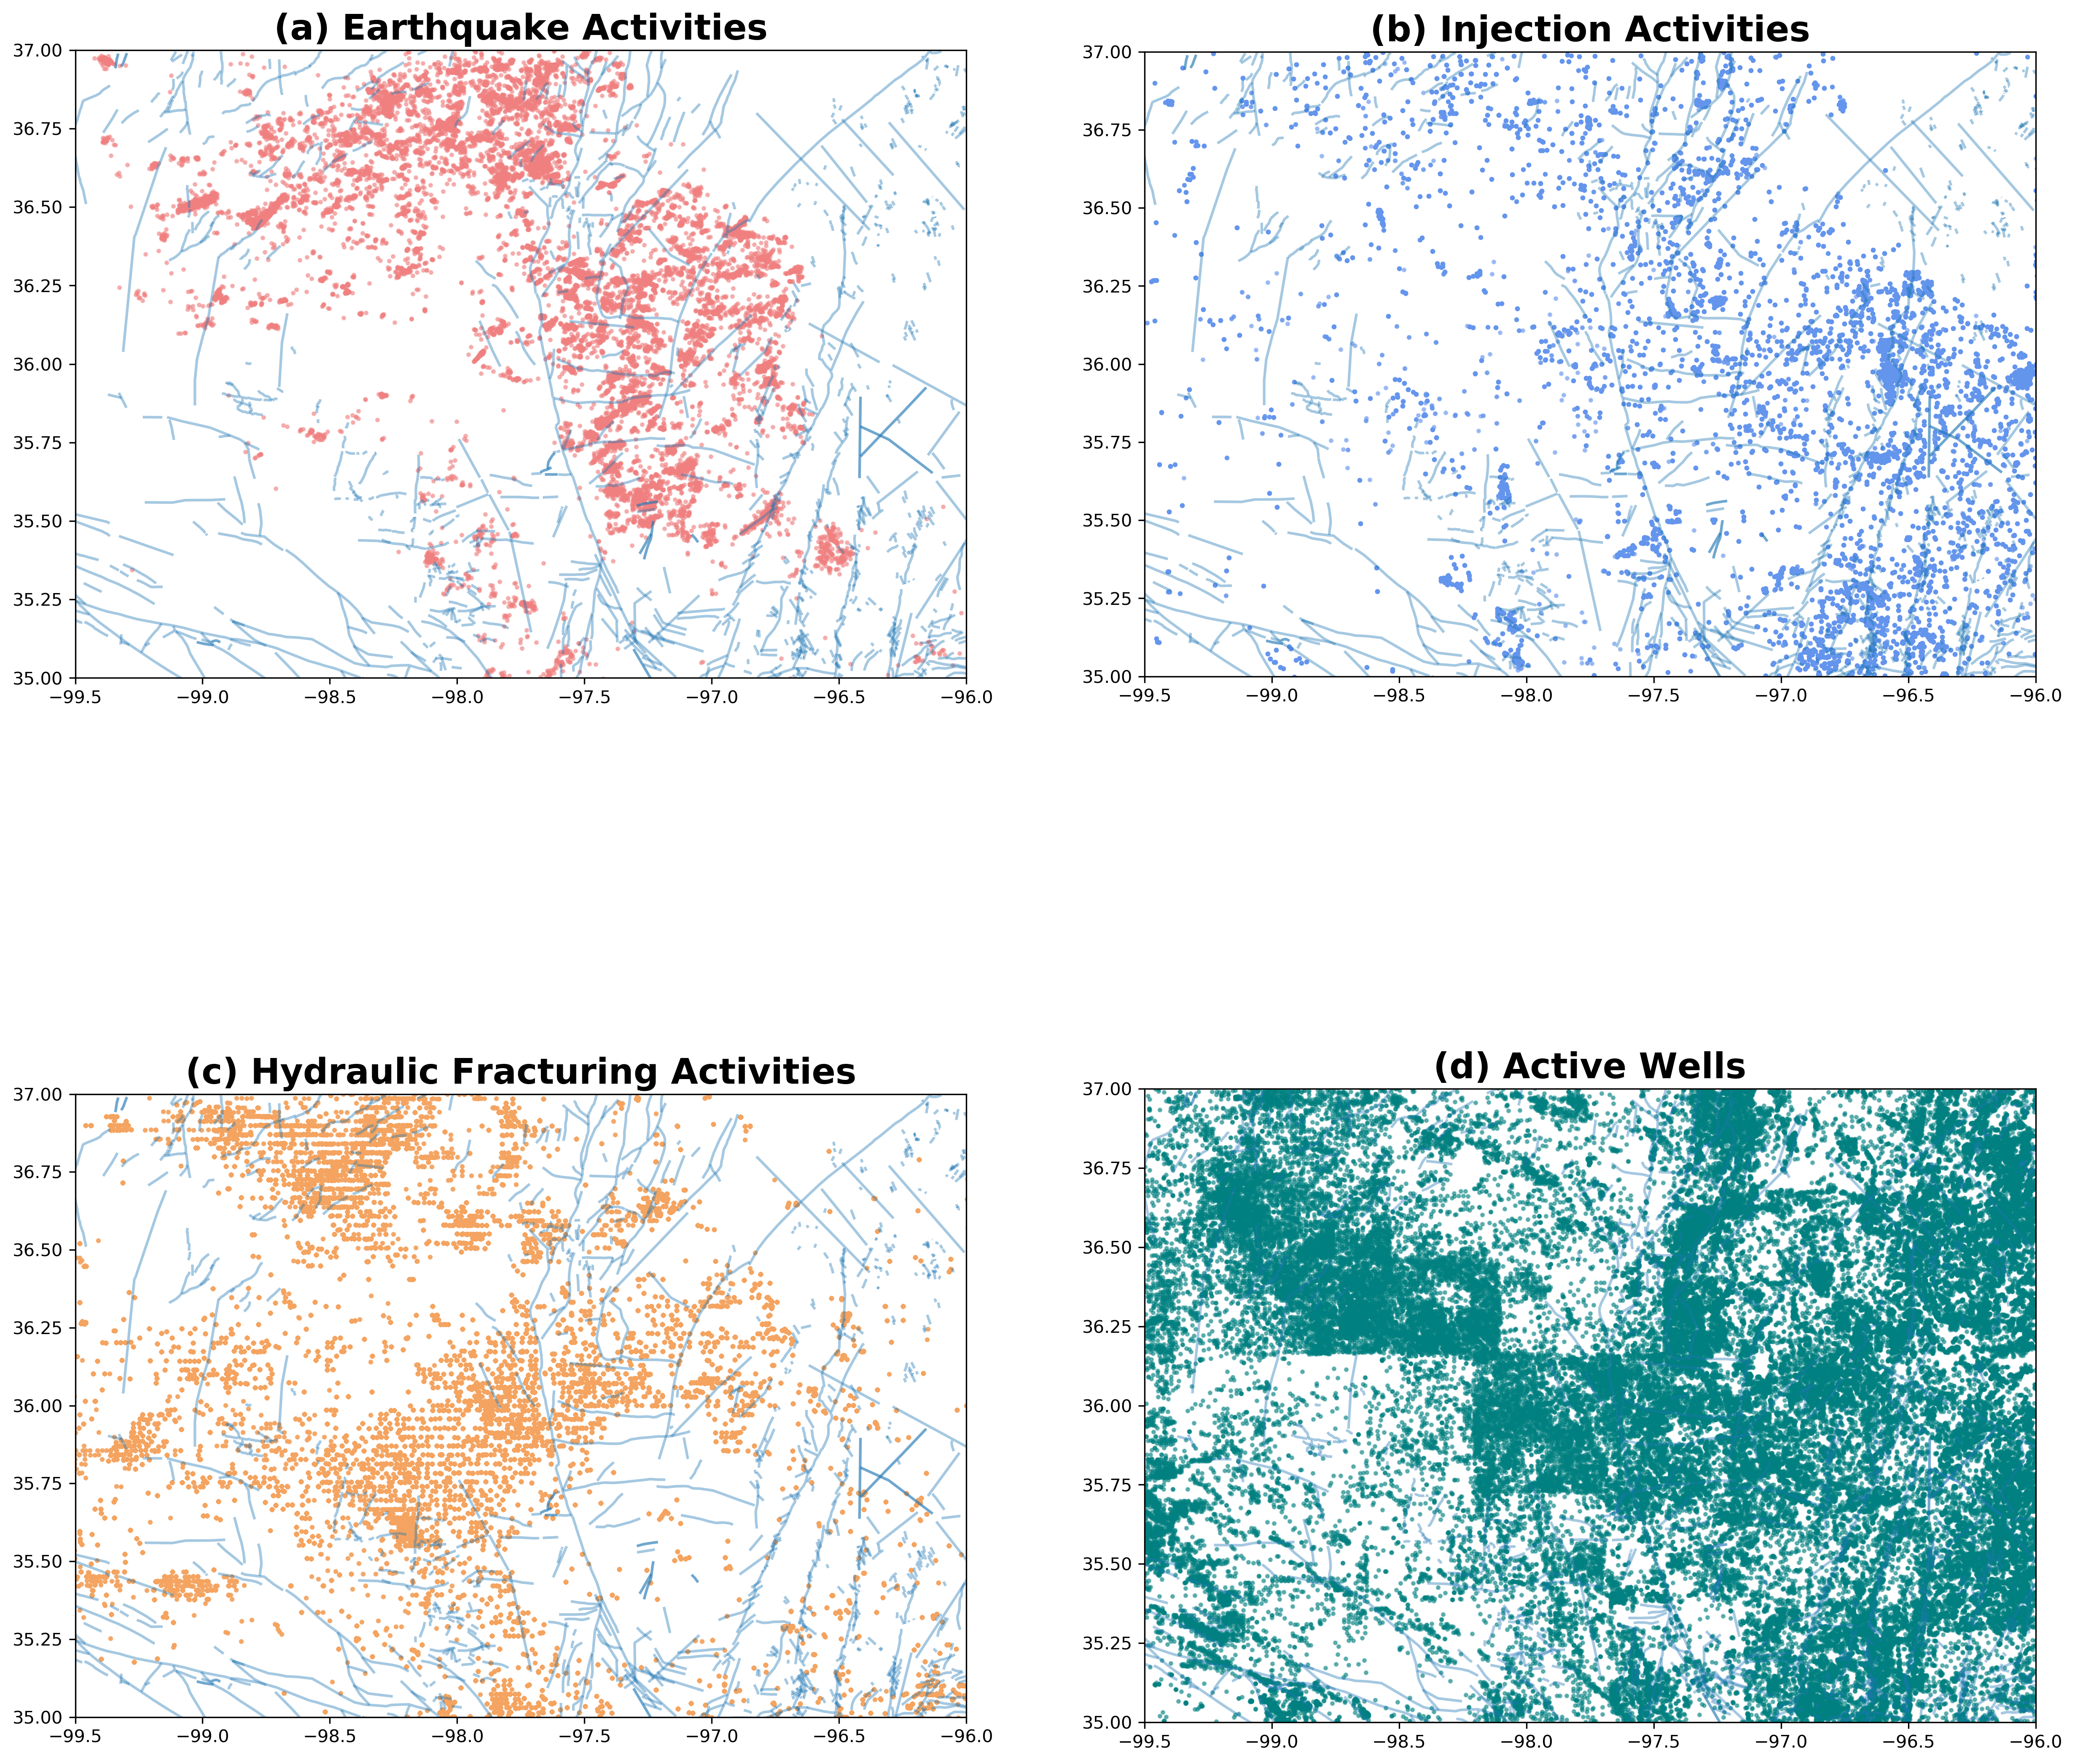

In [125]:
# zip x and y coordinates into single feature
earthquake_geometry = [Point(xy) for xy in zip(earthquake_df['longitude'], earthquake_df['latitude'])]
earthquake_geo_df = gpd.GeoDataFrame(earthquake_df, crs = "EPSG:4326", geometry = earthquake_geometry) #4326 is the code for a lat,long coordinate system

injection_geometry = [Point(xy) for xy in zip(injection_df['LON'], injection_df['LAT'])]
injection_geo_df = gpd.GeoDataFrame(injection_df, crs = "EPSG:4326", geometry = injection_geometry)

# zip x and y coordinates into single feature
HF_geometry = [Point(xy) for xy in zip(HF_df['Longitude'], HF_df['Latitude'])]
# create GeoPandas dataframe
HF_geo_df = gpd.GeoDataFrame(HF_df, crs = "EPSG:4326", geometry = HF_geometry)

# zip x and y coordinates into single feature
well_geometry = [Point(xy) for xy in zip(well_df['Surface Longitude'], well_df['Surface Latitude'])]
# create GeoPandas dataframe
well_geo_df = gpd.GeoDataFrame(well_df, crs = "EPSG:4326", geometry = well_geometry)

# earthquake 分布
# create figure and axes, assign to subplot
fig = plt.figure(figsize=(20, 20), dpi=300)
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax1, alpha=0.4)
oklahoma_map.plot(ax=ax2, alpha=0.4)
oklahoma_map.plot(ax=ax3, alpha=0.4)
oklahoma_map.plot(ax=ax4, alpha=0.4)

# add geodataframe to axes
# assign ‘magnitude’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
earthquake_geo_df.plot(ax=ax1, alpha=0.5, legend=True, markersize=3, color='lightcoral')
injection_geo_df.plot(ax=ax2, alpha=0.5, legend=True, markersize=3, color='cornflowerblue')
HF_geo_df.plot(ax=ax3, alpha=0.5, legend=True, markersize=3, color='sandybrown')
well_geo_df.plot(ax=ax4, alpha=0.5, legend=True, markersize=3, color='teal')

# add title to graph

# rec = plt.gca()
# rec.add_patch(plt.Rectangle((-100, 34.5), 4, 2.5, color="black", fill=False, linewidth=1))

# set latitiude and longitude boundaries for map display

ax1.set_xlim(-99.5, -96)
ax1.set_ylim(35, 37)
ax2.set_xlim(-99.5, -96)
ax2.set_ylim(35, 37)
ax3.set_xlim(-99.5, -96)
ax3.set_ylim(35, 37)
ax4.set_xlim(-99.5, -96)
ax4.set_ylim(35, 37)
ax1.set_title('(a) Earthquake Activities', fontsize=20,fontweight='bold')
ax2.set_title('(b) Injection Activities', fontsize=20,fontweight='bold')
ax3.set_title('(c) Hydraulic Fracturing Activities', fontsize=20,fontweight='bold')
ax4.set_title('(d) Active Wells', fontsize=20,fontweight='bold')

# ax4 = fig.add_subplot(2,2,4)
# c = ax4.contourf(xx, yy, z_interp, label="Smoothed depth to basement", levels=20)
# cbar = plt.colorbar(c)
# cbar.set_label("Depth to basement [m]")
# ax4.set_xlim(-100, -96)
# ax4.set_ylim(34.5, 37)
# ax4.set_title('Depth to basement in Oklahoma', fontsize=15,fontweight='bold')


# show map
plt.show()